In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
df.shape

(10, 3)

In [4]:
df.isna().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [6]:
X = df.drop("Salary", axis=1).values
Y = df["Salary"].values

In [7]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
X[:, 0] = label.fit_transform(X[:, 0])

In [8]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [9]:
from sklearn.ensemble import RandomForestRegressor

re = RandomForestRegressor()

In [10]:
grid = {
       "n_estimators": [100, 200, 300, 500, 1000],
       "criterion" : ["squared_error", "absolute_error", "poisson"],
       "max_depth": [None, 3, 5, 6, 7]
       }

In [11]:
from sklearn.model_selection import GridSearchCV

grid_re = GridSearchCV(re, grid, n_jobs=-1, verbose=1)
grid_re.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


c:\users\shiva\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
  category=UserWarning,


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [None, 3, 5, 6, 7],
                         'n_estimators': [100, 200, 300, 500, 1000]},
             verbose=1)

In [12]:
grid_re.best_params_

{'criterion': 'squared_error', 'max_depth': None, 'n_estimators': 100}

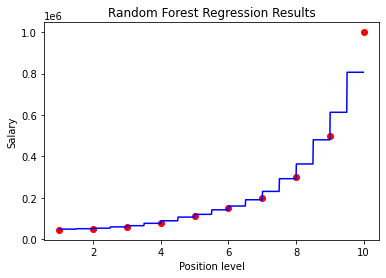

In [16]:
X_Grid = np.arange(min(X), max(X), 0.01)
X_Grid = X_Grid.reshape((len(X_Grid), 1))
plt.scatter(X,Y, color = 'red')
plt.plot(X_Grid, regressor.predict(X_Grid), color = 'blue')
plt.title('Random Forest Regression Results')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()